In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [5]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
ensemble = VotingClassifier([
    ('lr', LogisticRegression(random_state = 42)),
    ('rf', RandomForestClassifier(random_state = 42)),
    ('svc', SVC(probability = True, random_state = 42))
], voting = 'soft')

ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [16]:
for name, clf in ensemble.named_estimators_.items():
    print(name, '=', clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [17]:
ensemble.score(X_test, y_test)

0.92

# Bagging and pasting

While ensembling you could use the same learning method, but train each model on a different random selection of the training data. There are two ways to do this.  
- Bagging: A data point can appear multiple times in the training set of one model.
- Pasting: A data point can appear at most once in the training set of one model.

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100,
                           n_jobs = -1, random_state=42
                           )

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [42]:
bag_clf.score(X_test, y_test)

0.904

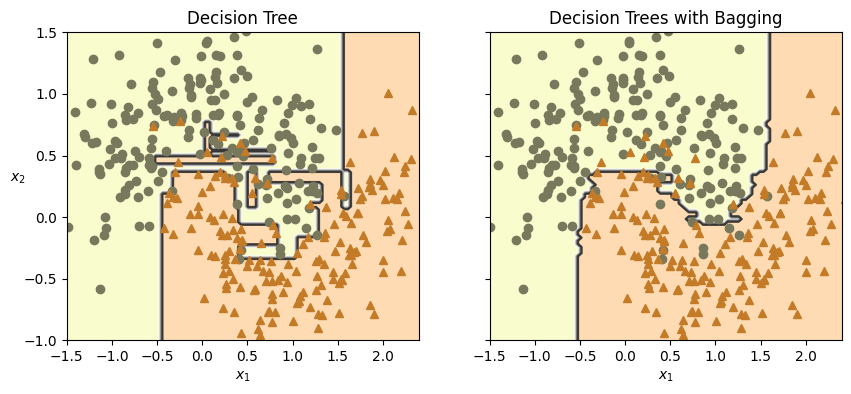

In [32]:
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")

plt.show()

### oob instances
- If bootstrap=True then mathematically only 63% instances end up in the training set of each predictor. There fore the remaining 37% are called oob instances.
- These 37% will be different for all n estimators. And if there are huge number of estimators then it is possible most the whole training set would be in this oob.
- A bagging ensemble can be evaluated using OOB instances, without the need for a
separate validation set: indeed, if there are enough estimators, then each instance in the
training set will likely be an OOB instance of several estimators, so these estimators can
be used to make a fair ensemble prediction for that instance. Once you have a prediction
for each instance, you can compute the ensemble’s prediction accuracy (or any other
metric).

In [37]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                           n_jobs = -1, random_state=42,oob_score=True
                           )

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True, random_state=42)

In [38]:
bag_clf.oob_score_

0.896

In [39]:
bag_clf.score(X_test, y_test)

0.92

In [48]:
# instead of sampling instances only we sample features as well using only 90% of features

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                           n_jobs = -1, bootstrap=True, random_state=42,max_features=0.9
                           )

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.9,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [49]:
bag_clf.score(X_test, y_test)

0.808

# Random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
rnd_clf.score(X_test, y_test)

0.912

## Feature importance

Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average,
across all trees in the forest. More precisely, it is a weighted average, where each node’s
weight is equal to the number of training samples that are associated with it

In [52]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(iris.data, iris.target)
for score, name in zip(rf.feature_importances_, iris.data.columns):
    print(name, round(score,2))


sepal length (cm) 0.11
sepal width (cm) 0.02
petal length (cm) 0.44
petal width (cm) 0.44
